In [1]:
# imports
import numpy as np
import random
from datetime import datetime
import time
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 8]
random.seed(datetime.now())

In [2]:
# randomly assigns edges and mirrors to make adj mat
def make_random_mat(sidelen, prob):
    mat = np.zeros(shape=(sidelen, sidelen))
    for i in range(sidelen):
        for j in range(i):
            if i != j and random.random() < prob:
                mat[i, j] = 1
                mat[j, i] = 1
    return mat

# first half of nodes can only connect to second half of nodes
# to ensure bipartite
def make_bipartite_mat(numeachside, prob):
    mat = np.zeros(shape=(2*numeachside, 2*numeachside))
    for i in range(numeachside):
        for j in range(numeachside, 2*numeachside):
            if i != j and random.random() < prob:
                mat[i, j] = 1
                mat[j, i] = 1
    return mat

# returns if matrix has triangle
# short circuits, aka returns early if triangle found
def has_triangle(edges):
    n = edges.shape[0]
    twoedges = np.matmul(edges, edges)
    for i in range(n):
        for j in range(i):
            # if there's a 1 len path and 2 len path
            if twoedges[i, j] and edges[i, j]:
                return True
    return False 

In [3]:
# regular random matrix test
dataT1 = []
dataF1 = []
power2 = 16
trials = 3
alpha = 0.75
for trial in range(trials):
    for i in range(1, power2):
        adj = make_random_mat(pow(2, i), 0.5)
        start = time.time()
        has_tri = has_triangle(adj)
        end = time.time()
        if has_tri:
            dataT1.append([i, end - start])
        else:
            dataF1.append([i, end - start])
        if end - start > 10:
            print(i, pow(2, i), end - start)

13 8192 14.660768985748291
14 16384 116.48539590835571
15 32768 1112.5595502853394
13 8192 15.185948371887207
14 16384 117.138427734375
15 32768 1051.7112920284271
13 8192 15.919872522354126
14 16384 117.83389663696289
15 32768 1017.060836315155


Text(0.5, 1.0, 'Random Graph')

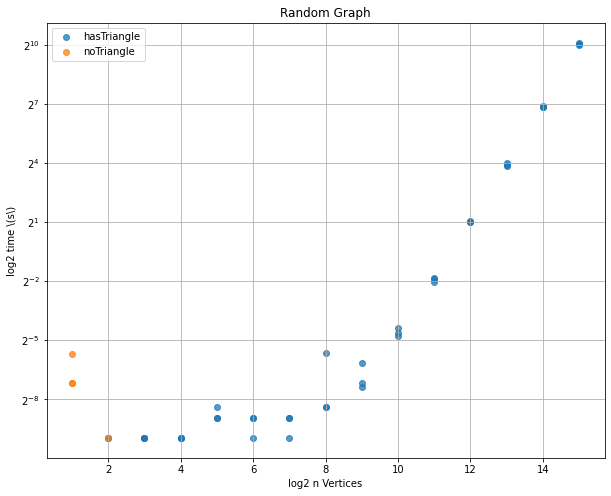

In [26]:
# plot
plt.figure()
data = np.array(dataT1)
data[:,1] += 0.001
plt.scatter(data[:,0], data[:,1], label="hasTriangle", alpha=alpha)
data = np.array(dataF1)
data[:,1] += 0.001
plt.scatter(data[:,0], data[:,1], label="noTriangle", alpha=alpha)
plt.legend(loc="upper left")
plt.semilogy(base=2)
plt.grid()
plt.xlabel("log2 n Vertices")
plt.ylabel("log2 time \(s\)")
plt.title("Random Graph")

In [5]:
# random bipartite matrix test
dataF2 = []
power2 = power2 - 1
for trial in range(trials):
    for i in range(1, power2):
        adj = make_bipartite_mat(pow(2, i), 0.5)
        i = i + 1
        start = time.time()
        has_tri = has_triangle(adj)
        end = time.time()
        dataF2.append([i, end - start])
        if end - start > 10:
            print(i, pow(2, i), end - start)

13 8192 28.797911167144775
14 16384 174.79422855377197
15 32768 1165.3922345638275
13 8192 28.572033643722534
14 16384 173.54537510871887
15 32768 1220.6850173473358
13 8192 27.527090072631836
14 16384 172.25493097305298
15 32768 1175.7471351623535


Text(0.5, 1.0, 'Random Bipartite Graph')

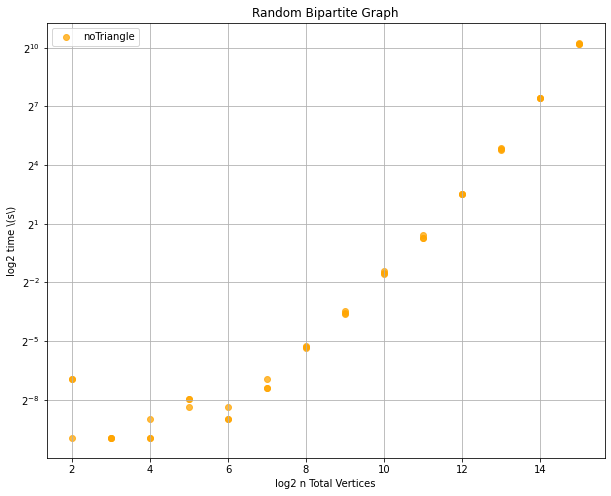

In [20]:
# plot
plt.figure()
data = np.array(dataF2)
data[:,1] += 0.001
plt.scatter(data[:,0], data[:,1], label="noTriangle", alpha=alpha, color="orange")
plt.legend(loc="upper left")
#plt.yscale("log")
plt.semilogy(base=2)
plt.grid()
plt.xlabel("log2 n Total Vertices")
plt.ylabel("log2 time \(s\)")
plt.title("Random Bipartite Graph")